### Individual Homework

#### Enter your name here: Anna Maria Reidel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [3]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [68]:
genre_count = (
    movies["genre"]
    .value_counts()
    .reset_index()
)

genre_count





,genre,count
0,Comedy,848
1,Action,738
2,Drama,498
3,Adventure,288
4,Crime,202
5,Biography,135
6,Horror,131
7,Animation,35
8,Fantasy,28
9,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [5]:
# average gross earnings and budget per genre
avg_earnings_budget = (movies.groupby("genre")[["gross", "budget"]].agg("mean").reset_index())
avg_earnings_budget

# return_on_budget column
avg_earnings_budget["return_on_budget"] = avg_earnings_budget["gross"] / avg_earnings_budget["budget"]

# ranked genres by return_on_budget
avg_earnings_budget = avg_earnings_budget.sort_values(by="return_on_budget", ascending=False)
avg_earnings_budget

,genre,gross,budget,return_on_budget
11,Musical,9.208400e+07,3.189500e+06,28.870983
8,Family,1.491605e+08,1.483333e+07,10.055763
16,Western,2.082188e+07,3.465000e+06,6.009202
6,Documentary,1.735397e+07,5.887852e+06,2.947420
10,Horror,3.771374e+07,1.350492e+07,2.792593
9,Fantasy,4.240884e+07,1.758214e+07,2.412040
4,Comedy,4.263055e+07,2.444632e+07,1.743843
12,Mystery,6.753302e+07,3.921875e+07,1.721958
2,Animation,9.843379e+07,6.170143e+07,1.595324
3,Biography,4.520181e+07,2.854370e+07,1.583600


Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director

In [6]:
# check out director and gross
movies[["director","gross"]]

movies.isna().sum()

# no missing values now group by director
movies_top15_director = (
    movies
     .groupby("director")
     .agg(
         total_gross = ("gross","sum"), 
         mean_gross = ("gross","mean"),
         median_gross = ("gross","median"), 
         std_gross = ("gross","std")
     )
     .sort_values("total_gross", ascending=False)
     .reset_index()
)

movies_top15_director

,director,total_gross,mean_gross,median_gross,std_gross
0,Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
1,Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
2,Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
3,Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
4,James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
...,...,...,...,...,...
1361,Bruce Dellis,2468,2.468000e+03,2468.0,NaN
1362,Paul Bunnell,2436,2.436000e+03,2436.0,NaN
1363,Alex Craig Mann,1332,1.332000e+03,1332.0,NaN
1364,Ricki Stern,1111,1.111000e+03,1111.0,NaN


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

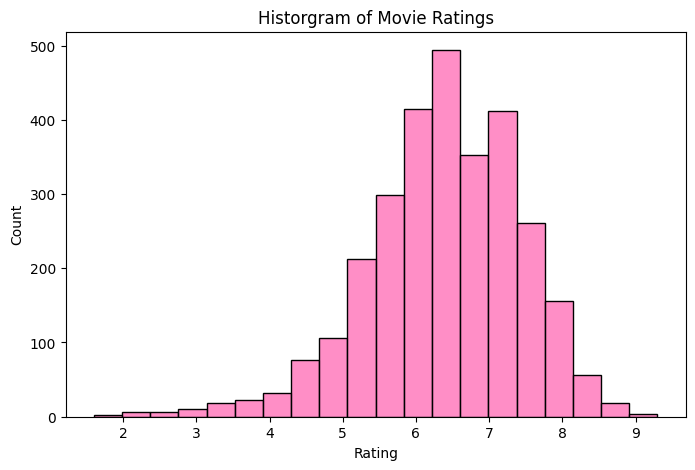

In [70]:
ratings_by_genre = movies.groupby("genre")["rating"].agg(["mean", "median", "min", "max", "std"]).reset_index()
ratings_by_genre

# create historgram for distribution of ratings
plt.figure(figsize=(8,5))
sns.histplot(
    data = movies, 
    x = "rating", 
    bins = 20, 
    color = "hotpink"
)

plt.title("Historgram of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [35]:
# I want to compare romance vs action movies in terms of average facebook likes and gross
cool_table = movies[movies["genre"].isin(["Romance", "Action"])].groupby("genre")[["cast_facebook_likes", "gross"]].mean().round(0)
cool_table

,cast_facebook_likes,gross
genre,,
Action,14597.0,86583860.0
Romance,8076.0,31264848.0


The average cast in Action movies gets almost double the FaceBook likes compared to Romance movies, according to the collaected data. Action movies also gross more at the box office, but Romance movies still manage to draw strong audiences despite their cast's lower social media visibility. 

#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

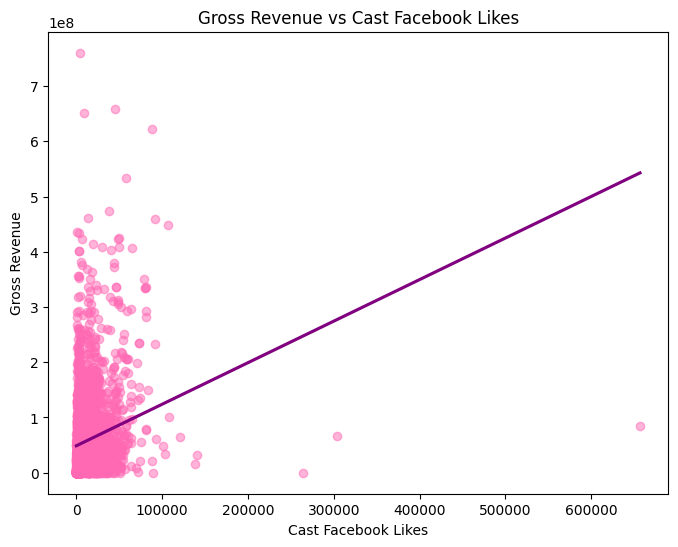

In [15]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=movies, 
    x = "cast_facebook_likes",
    y = "gross",
    scatter_kws = {"color":"hotpink", "alpha":0.5}, 
    line_kws = {"color":"purple"}, 
    ci = None
)

plt.title("Gross Revenue vs Cast Facebook Likes")
plt.xlabel("Cast Facebook Likes")
plt.ylabel("Gross Revenue")
plt.show()

Looking at this scatterplot, I would deduce that the number of Facebook likes is not a strong predictor of box office gross revenue as most points are clustered near the lower left with no clear trend.

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

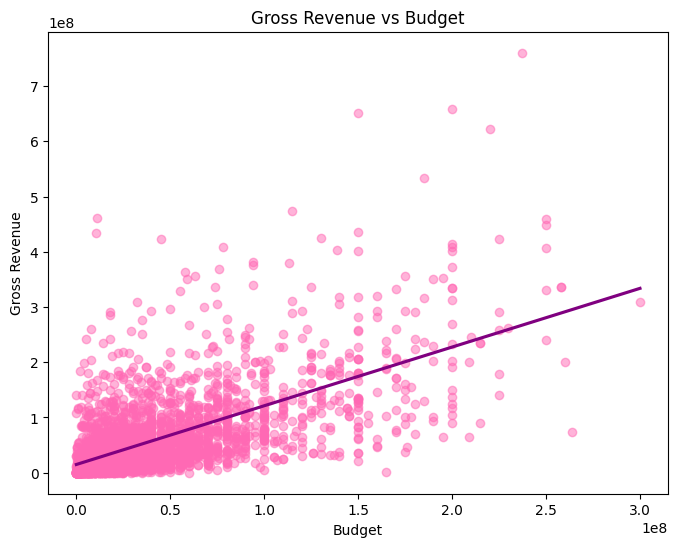

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    data = movies, 
    x = "budget",
    y = "gross",
    scatter_kws = {"color":"hotpink", "alpha":0.5}, 
    line_kws = {"color":"purple"}, 
    ci = None
)

plt.title("Gross Revenue vs Budget")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.show()

Looking at this scatterplot, I would deduce that budget appears to be a somewhat better predictor of box office gross revenue than cast Facebook likes as there is a clearer positive trend, but the wide spread of points suggests that budget alone is still not a very reliable predictor.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

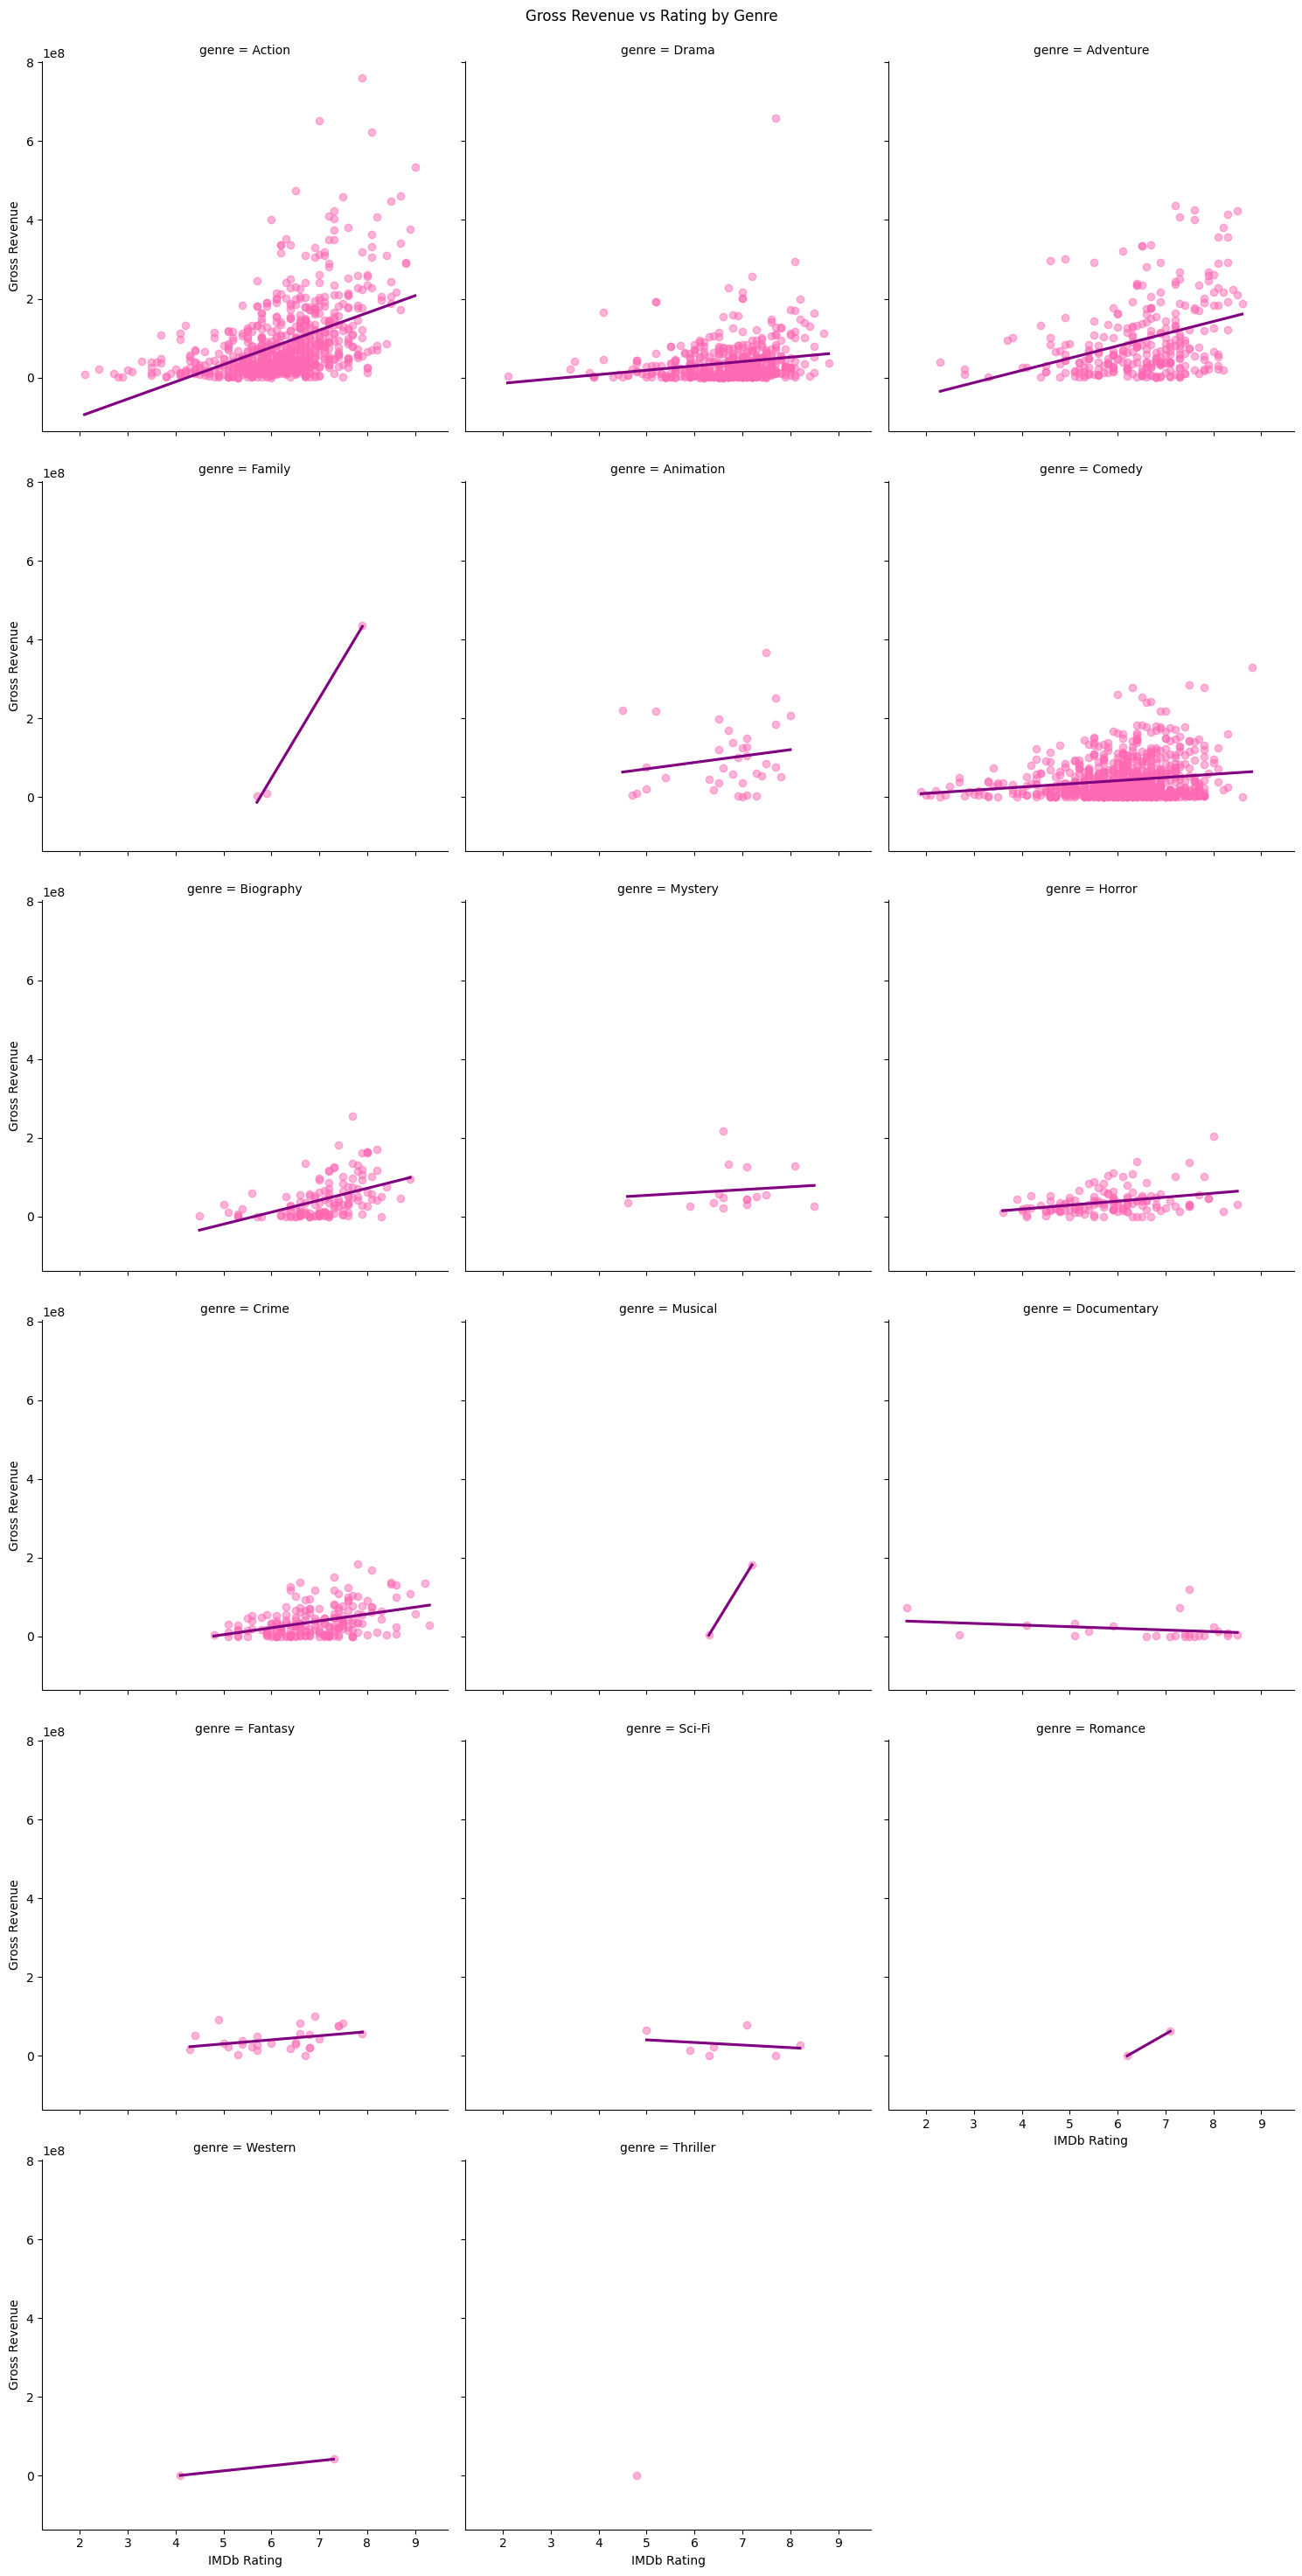

In [46]:
g = sns.lmplot(
    data = movies,
    x = "rating", 
    y = "gross", 
    col = "genre", 
    col_wrap = 3, 
    scatter_kws = {"color":"hotpink", "alpha":0.5},
    line_kws = {"color":"purple"}, 
    ci = None
)

g.set_axis_labels("IMDb Rating", "Gross Revenue")
g.fig.suptitle("Gross Revenue vs Rating by Genre")
g.fig.subplots_adjust(top=0.96)


    

Looking at the faceted scatterplots, IMDb ratings do not look like a strong predictor of box office overall as the points are very spread out in most genres and the trend lines are almost flat. Some genres (like Action or Biography) show a bit of a positive trend, but even there many outliers exist where low-rated movies made a lot of money or highly-rated ones made very little. 
What strikes me a little bit strange is that for some genres (like Sci-Fi, Romance, or Western), there are very few data points, and the regression line looks weirdly flat. This is probably due to there just being too little data to form a real pattern. 

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

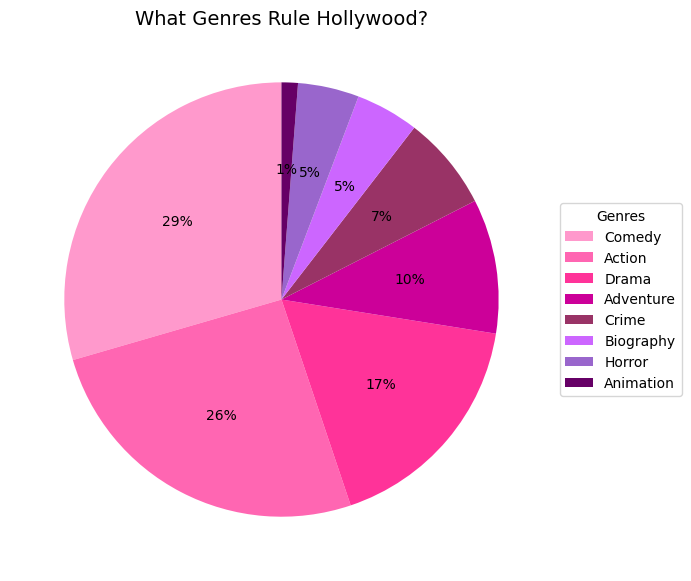

In [65]:
genre_counts = movies["genre"].value_counts().head(8)

colors = [
    "#ff99cc",  
    "#ff66b2",  
    "#ff3399",  
    "#cc0099",  
    "#993366",  
    "#cc66ff",  
    "#9966cc", 
    "#660066"  
]


plt.figure(figsize=(7, 7))
plt.pie(
    genre_counts,
    labels=None,
    autopct="%1.0f%%",       
    startangle=90,             
    colors=colors,
    textprops={"fontsize": 10, "color": "black"},
)

plt.legend(
    genre_counts.index,
    title="Genres",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("What Genres Rule Hollywood?", fontsize=14, pad=2)
plt.tight_layout()
plt.show()


Comedy and Action genres seem to be the most popular movie genres in the Kaggle IMDB 5000 Dataset as they make up more than 50% of whole movie genres. Data-driven conclusion: Hollywood really just wants to to laugh, run, and maybe cry in drama!

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.